# SE 132 Machine Learning for Structural Engineering (Spring 2024)
# Constitutive modeling: modeling of soil-water retention behavior
### Due June 7 (11:59 PM PST), 2024

Instructor: Professor J.S. Chen (js-chen@ucsd.edu) <br>
TA: Yanran Wang (yaw053@ucsd.edu)

---

**Note**: Please run the below code cell to install tensorflow of **version 2.12.0**. After you run the below code cell for the first time, you will need to restart the session and run it again to finish the installation.

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 950.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Unin



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
base_path = 'drive/MyDrive/se132/FinalProject/FinalProject/' # set your own path to read the data


# Project Descriptions:

In this project, you will apply various Machine Learning (ML) techniques, including <u>Polynomial regression, Ridge regression, K-nearest neighbors (KNN) regression, and Artifical neural networks (ANN)</u>, to predict the $\color{green}{\text{constitutive relationship between the degree of saturation (S), temperature (T), and matric suction ($\psi$)}}$ of the MX80 bentonite soil.




- The inputs contains <u> two features</u> : **temperature** ($T$) in Degree Celsius and **suction** ($\psi$) in MPa. The targeted output is the **degree of saturation** ($S$). $\color{green}{\text{Therefore, you are asked to use the provided input temperature and suction to predict the degree of saturation.}}$ Note that the **output degree of saturation** should be in the range of $\color{red}{\text{0% to 100%}}$, or [0,1].


- Note that because we only considered **temperature** ($T$) and **suction** ($\psi$) as input features, the predicted soil-water retention model is only applicable **to a specific type of soil sample (MX80 bentonite)**, which will be introduced later.



The ML models will be trained using the dataset generated from experimental data presented in [1] and [2] and an existing generalized isothermal soil-water retention phenomenological equation [3]. You will need to

- perform cross-validation to find the best set of parameters for each ML model
- calculate the mean-squared-error (MSE) of testing data
- plot the predicted soil-water retention curves (predicted degree of saturation vs. suction) at different temperature
- compare the testing MSEs of these ML models and discuss your observations.

The **outline** of this Notebook is as follows:

1. Introduction and data preparation
    - Description of MX80 bentonite soil
    - Introduction of soil-water retention curve
    - Experimental data
2. Parametric Models
    - Polynomial regression
    - Ridge regression
3. Non-parametric Models
    - K-nearest neighbors (KNN) regression
    - Artifical neural networks (ANN) regression
4. Comparison and Discussion

Write your code when you see **`### Start Coding`**. The places need to be filled are also marked with `?`

# 1. Introduction and data preparation



## 1.1 Description of MX80 Bentonite Soil

MX80 Bentonite from Wyoming is one of the most popular types of bentonites used
internationally in bentonite buffer systems for nuclear waste storage. Because of large swelling of bentonite, it provides a tightly sealed, low-permeability barrier for nuclear waste container.

The MX80 bentonite sample we are investigating has a **dry density** of $\rho = 1.60 \text{ } g/cm^3$ and has a **specific gravity** of $G_s=2.76$.

### 1.1.1 Basic properties for soil

Soil mass is generally referred to as three-phase solid consisting **particles, liquid, and gas**. For many civil engineering applications, the liquid usually is considered to be **water** and the gas as **air**, as shown in the below figure.

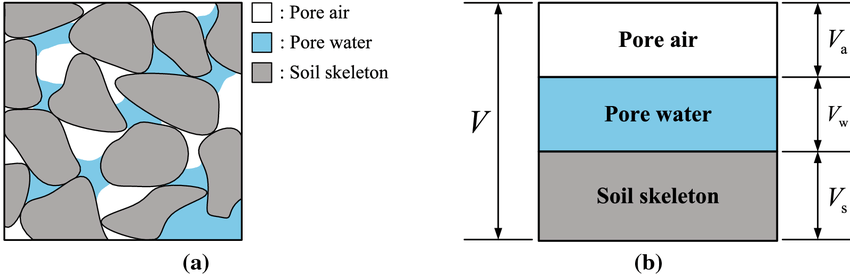

In [ ]:
from IPython.core.display import Image, display
display(Image(filename=base_path + 'images/SoilEquation.PNG',width=800))

There are some basic properties in soil mechanics:

- **Porosity**, n, the ratio of volume of voids ($V_a + V_w$) to the total volume:

$$ n=\frac{V_v}{V} = \frac{V_a + V_w}{V} \tag{1}$$

- **Volumetric water content**, $\theta$:

$$ \theta=\frac{V_w}{V} \tag{2}$$

- **Degree of saturation**, S, the ratio of volume of water to the volume of voids:

$$ S = \frac{V_w}{V_v} = \frac{\theta}{n} \tag{3}$$

- **Matric suction**, $\psi$:

$$ \psi = p_a-p_w \tag{4}$$
where $p_a$ and $p_w$ are the pore-air and pore-water pressure. $p_a$ is conventionally referenced as zero, so the suction is typically treated as the negative of water pressure.

## 1.2 What is a soil-water retention curve?

The soil-water retention curve (SWRC) is a vital relationship that describes unsaturated soil behaviors. The soil-water retention curve establishes a **relationship between water content** (commonly represented by volumetric water content $\theta$ or saturation $S$) **and matric suction** $\psi$ (i.e., the difference between the pore air pressure and pore water pressure).

The soil-water retention curve is typically estimated using **parameterized models** in the literature, which are also referred as **phenomenological models**. Various isothermal (not varying in temperture) parametric models have been proposed in the literature, including the Brooks and Corey (BC) model [4], van Genuchten (VG) model [5], and Fredlund and Xing (FX) model [6]. Several factors, such as the pore size distribution, porosity, pore fluid chemical composition, temperature, and soil mineralogy affect the soil-water retention behavior, resulting in **parametric models with multiple fitting parameters**.

For example, more recently Lu proposed a generalized soil-water retention curve in [3], which described relationship between suction and degree of saturation with fixed temperature (isothermal). However, Lu's model is not generalizable to varying temperature (non-isothermal) condition.

The typical phenomenological soil-water retention curves at different temperatures look like as follows:

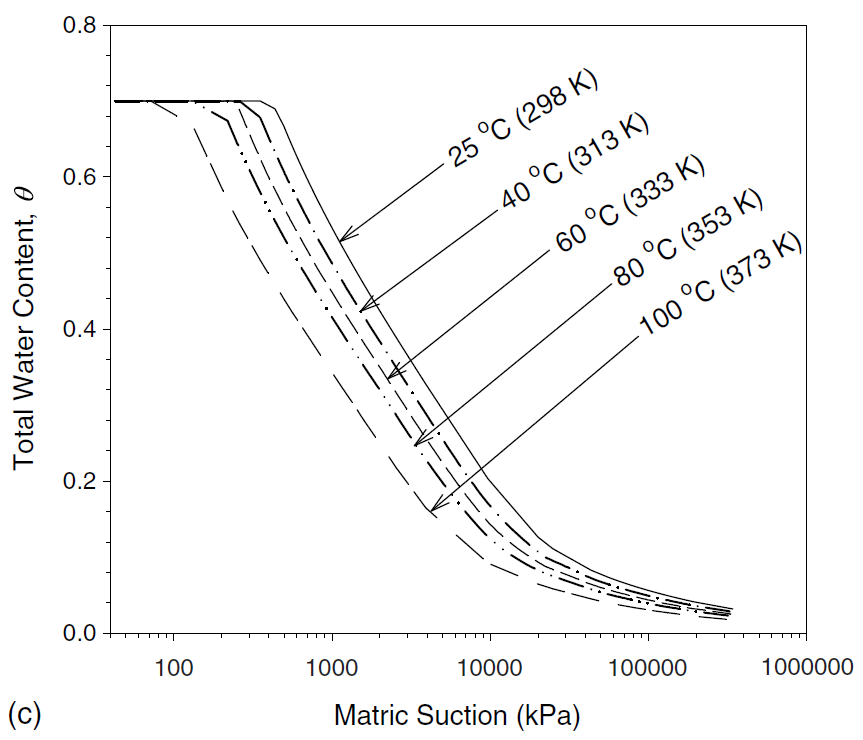

In [ ]:
display(Image(filename=base_path + 'images/TypicalSWRC.PNG',width=500))

In the above figure, each curve represents the relationship between **suction** and volumetric water content (related to **degree of saturation**, see Eq. (3)) at **a specific temperature**. As you can see, when the temperature gets higher, the curve is shifting towards left.

In this project, we will use Machine Learning methods to obatain a **non-isothermal** soil-water retention curve. As a comparison, we will first explore polynomial regression models and make a comparison to the non-parametric KNN and ANN models.

## 1.3 Experimental Data


In order for machine learning algorithms to learn the soil-water retention behaviors, we need sufficient training data. The provided data in the `Data.csv` file are prepared by combing the experimental data from [1] and [2], as shwon below, and fitting Lu's model [3] for specific temperatures.

**Import relative libraries and modules**

In [ ]:
### Start Coding: Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import time
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)
from tensorflow import keras
print('Keras version: ', keras.__version__)
from keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(1)


Tensorflow version:  2.12.0
Keras version:  2.12.0


**Read and show data**

In [ ]:
### Start coding: read the data and view the first 10 rows of data points (using Data.csv)
df = pd.read_csv(base_path + 'data/Data.csv')
df.head(10)


,Temperature,Suction,S
0,66.250000,58.144358,0.494224
1,65.000000,74.017600,0.419195
2,23.981367,113.768306,0.267319
3,70.008809,48.200936,0.529120
4,30.750000,120.184265,0.228080
5,60.054985,92.636198,0.332869
6,79.976239,28.090927,0.587149
7,42.250000,37.908815,0.569389
8,99.905452,44.817030,0.494816
9,79.986763,25.151843,0.601671


In [ ]:
df = df.to_numpy() # convert Dataframe to Numpy array
print('Shape of Dataframe: ', df.shape)
n_samples = df.shape[0]   # number of samples
print('Number of samples: ', n_samples)
print(df)

Shape of Dataframe:  (2671, 3)
Number of samples:  2671
[[ 66.25        58.14435783   0.49422387]
 [ 65.          74.01760015   0.41919515]
 [ 23.98136713 113.7683064    0.26731873]
 ...
 [ 81.75       106.1096355    0.2285537 ]
 [109.5         17.56718793   0.57113347]
 [ 74.75        55.95675872   0.49464529]]


**Define the inputs and output, then split the data into training and testing**

In [ ]:
### Start Coding:
### Inputs contains two features, which are the first two columns in your dataframe
### We have a scaler output, which is the last column in your dataframe
### Split the data into 30% for testing, set the random_state to be 1

x0 = df[:, 0:2] # input features: temperature and suction
y0 = df[:, 2] # output: degree of saturation (S)
y0 = y0.reshape(-1, 1)
test_size = 0.3            # 30% for testing set

x_train, x_test, y_train, y_test = train_test_split(x0, y0, test_size=test_size, random_state=1)

**Visualization of the dataset**

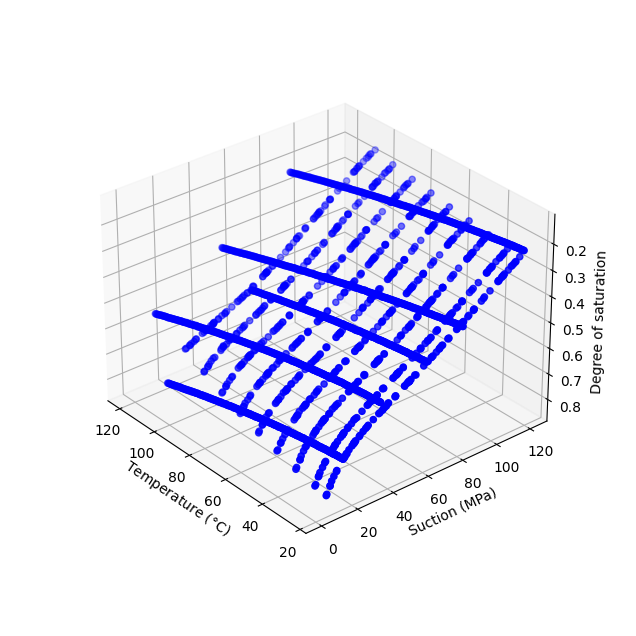

In [ ]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x0[:,[0]], x0[:,[1]], y0, c = 'b', marker='o')
ax.set_xlabel('Temperature ($\degree$C)')
ax.set_ylabel('Suction (MPa)')
ax.set_zlabel('Degree of saturation')
plt.grid()
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.view_init(-150, 40)

As shown in the above visualization, the provided data represents a surface in 3D, and each pair of input (temperature, suction) corresponds to a output degree of saturation.

The ranges of provided data are:
- Temperature, $T \in [24, 120]$ degree celcius
- Suction, $\psi \in [0.234, 121.335]$ MPa
- output degree of saturation, $S \in [0.139, 0.835]$

**Standardize both inputs and output to reduce variance and bias in data**

In [ ]:
### Start Coding: Standardize data
### Hint: using 'StandardScaler', initiate 'StandardScaler' for inputs and output separately
### Hint: standarization process involve: initiate the standardscaler -> fit -> transform

scalerX = StandardScaler()
scalerY = StandardScaler()

## Fit
scalerX.fit(x_train)
scalerY.fit(y_train)

## Transform
x_train_s = scalerX.transform(x_train)
y_train_s = scalerY.transform(y_train)

x_test_s = scalerX.transform(x_test)
y_test_s = scalerY.transform(y_test)

# 2. Parametric Models
- Polynomial regression
- Ridge regression

## 2.1 Polynomial Regression

**Model descriptions:**

A set of **input** temperature $ \{ T^{(i)}\}_{i=1}^m$ and suction $ \{ \psi^{(i)}\}_{i=1}^m$ data pairs with corresponding **targeted output** degree of saturation $ \{ S^{(i)}\}_{i=1}^m$ are provided. After we apply **polynomial feature transformation**, the given dataset can be expressed as:

$$ \{ \mathbf{x}^{(i)}, S^{(i)} \}_{i=1}^m $$

where $ \mathbf{x}^{(i)}$ is a vector of expanded input features and $ \mathbf{x}^{(i)} = [1, T^{(i)}, \psi^{(i)}, T^{(i)}\psi^{(i)}, ..., (T^{(i)})^d, (\psi^{(i)})^d]^T $ with $ d $ denoting the polynomial order.

Then we can apply multi-feature linear regression to predict the degree of saturation $S$, denoted as $\hat{S} \approx S$, and the prediction for $\mathbf{x}^{(i)}$ can be expressed in the following form:

$$ \hat{S}(\mathbf{x}^{(i)}) = (\mathbf{x}^{(i)})^T \hat{\boldsymbol{\theta}} = \hat{\theta}_0 + \hat{\theta}_1 T^{(i)} + \hat{\theta}_2 \psi^{(i)} + ... + \hat{\theta}_p (\psi^{(i)})^d \tag{5}$$

The optimal coefficients $\hat{\boldsymbol{\theta}} = [\hat{\theta}_0, \hat{\theta}_1, ..., , \hat{\theta}_p]^T $, with $p$ represents the total number of expanded features, can be obtained by minimizing the mean squared errors
$$J(\boldsymbol{\hat{\theta}}) = \frac{1}{m} \sum_{i=1}^m (\hat{S}(\mathbf{x}^{(i)}) - S^{(i)})^2 \tag{6}$$



---



**NOTE**: For example, for a two-feature input [a,b], the 'PolynomialFeature' with a degree $d = 2$ without bias would return $[a, b, a^2, ab, b^2]$, which means that with by a second order polynomial transformation, the number of features ($p$) expand from 2 for the first order polynomial to 5 for the second order polynomial.



---



**We are going to perform the following procedures in this section:**
- Use `validation_curve` for cross-validation to obtain the optimal degree for polynomial regression
- Train the best estimator from the grid search result
- Calculate the testing MSE
- Plot the `degree of saturation` vs. `suction` curves (predicted SWRC) at two temperatures

### Step 1:  Create Pipeline

In [ ]:
degree_range = np.arange(1, 21) # given a range of degrees [1,20] for cross-validation analysis in order to find the best flexibility

### Start Coding: create pipeline
### NOTE: use 'make_pipeline' here instead of the 'Pipeline'. Review Lab 6 for syntax
poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())

### Step 2: Perform 5-fold cross validation using the `validation_curve` from Scikit

In [ ]:
### Start Coding: The parameter to cross-validate is the "degrees" in the pipeline step "polynomialfeatures"
# Hint: Use `degree_range` variable as the parameter range
# Hint: use 'neg_mean_squared_error' as scoring

k_fold = 5
train_scores, CV_validation_scores = validation_curve(
                 poly_model, x_train_s, y_train_s,scoring ='neg_mean_squared_error', cv=k_fold,
                 param_name='polynomialfeatures__degree',
                 param_range=degree_range)

print(CV_validation_scores.shape)# (n_degrees,n_folds)

(20, 5)


### Step 3: Plot training and validation MSE scores vs. polynomial orders calculated in previous step

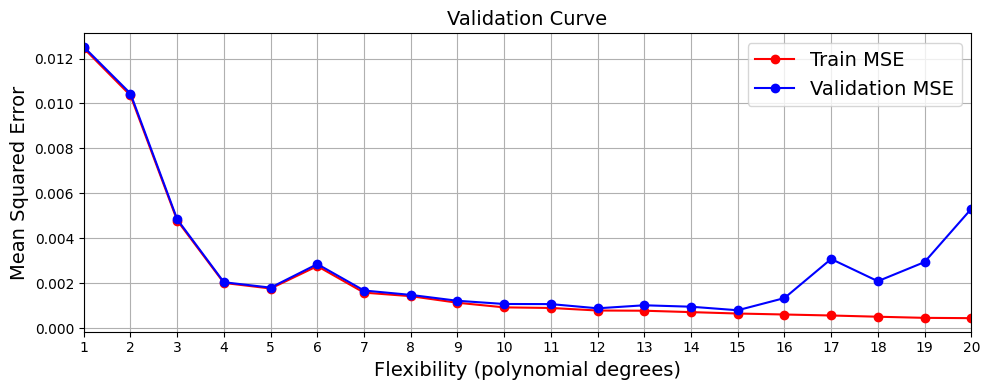

In [ ]:
### Start Coding: Plot the MSEs of training data and validation folds versus polynomial degrees
## Include axis labels and legend

plt.figure(figsize=(10, 4))
plt.plot(degree_range, -np.mean(train_scores, axis=1), 'ro-', label='Train MSE')
plt.plot(degree_range, -np.mean(CV_validation_scores, axis=1), 'bo-', label='Validation MSE')
plt.xlabel('Flexibility (polynomial degrees)', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Validation Curve', fontsize=14)
plt.legend(fontsize=14)
plt.xlim(degree_range[0], degree_range[-1])
plt.xticks(degree_range)
plt.grid()
plt.tight_layout()

### Step 4: Find the degree with the lowest Validation MSE

In [ ]:
### Start Coding
# Find the Degree that yields the minimum validation MSE. Store it in a list called 'degree_min'
degree_min = degree_range[-np.mean(CV_validation_scores, axis=1) == min(-np.mean(CV_validation_scores, axis=1))]
degree_min = degree_min[0]
print(degree_min)

15


### Step 5: Create model with selected degree and find test MSE
Use pipeline and set the optimal degree found in the previous step as input to the variable `degree` in the transformation method `PolynomialFeatures`. Report the training time.

In [ ]:
### Start Coding: Use `make_pipeline` to create a polynomial regression using the optimal degree found in the previous step
reg_model = make_pipeline(PolynomialFeatures(degree=degree_min), LinearRegression())
from time import time
start = time()
### Start Coding: Fit the instantiated model
reg_model.fit(x_train_s, y_train_s)

stop = time()

# print time
print('training time: {:.8f} s'.format(stop-start))

### Start Coding: Print the optimal coefficients
# Hint: coef_ and intercept_ are attributes of LinearRegression(), which can be accessed by calling .steps[1][1].coef_ or .steps[1][1].intercept_ for your pipeline model
# Hint: check the number of coefficients you get by using the 'len' function (It should be many!)

coef_ = reg_model.named_steps['linearregression'].coef_
intercept_ = reg_model.named_steps['linearregression'].intercept_

### Start Coding: Store predictions of training and testing data to the 'y_train_predict' and 'y_test_predict' variables
y_train_predict = reg_model.predict(x_train_s)
y_test_predict = reg_model.predict(x_test_s)

### Start Coding: Calculate testing MSE for training/testing data
poly_mse_train = mean_squared_error(y_train_s, y_train_predict)
poly_mse_test = mean_squared_error(y_test_s, y_test_predict)

print("The MSE for polynomial regression using training and testing data are \n", poly_mse_train, poly_mse_test)


training time: 0.06201410 s
The MSE for polynomial regression using training and testing data are 
 0.0006594860703496363 0.0012429326836020365


### Step 6: Plot the predicted soil-water retention curve
- We are goining to plot the soil-water retention curve for temperature at 30 and 100 degrees
- For each temperature, plot the **degree of saturation** vs. **log10 of suction**.

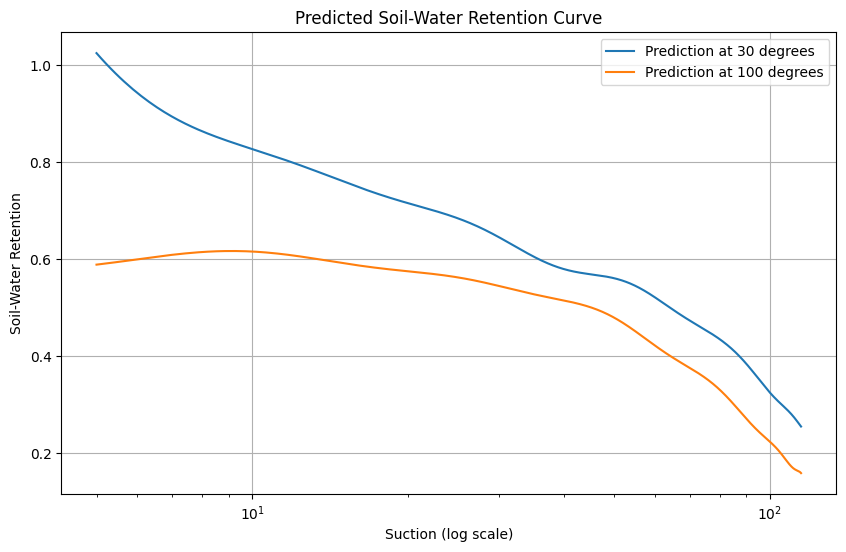

In [ ]:
# Generate 1000 suction points for plotting purpose
suc_plot = np.linspace(5, 115, 1000).reshape(1000,1) # create 1000 uniformly sampled suction data within range [5,115]
temp_plot1 = np.ones((1000,1))*30 # create a vector of 1000 data with each element as 30 degree
temp_plot2 = np.ones((1000,1))*100 # create a vector of 1000 data with each element as 100 degree

### Start Coding: from the above generated temperature and suction data points, construct the inputs for prediction
# Hint: horizontally stack the temperature and suction data, then standarize
# Note: temperature data comes first
X_test_30 = np.hstack((temp_plot1, suc_plot))
X_test_100 = np.hstack((temp_plot2, suc_plot))
X_test_30_scaled = scalerX.transform(X_test_30)
X_test_100_scaled = scalerX.transform(X_test_100)

### Start Coding: make prediction on X_test_30 and X_test_100, inverse transform your predictions to the original scales
### NOTE: make sure you use the correct 'StandardScaler'
y_30_predict = reg_model.predict(X_test_30_scaled)
y_100_predict = reg_model.predict(X_test_100_scaled)
y_30_predict_inv = scalerY.inverse_transform(y_30_predict.reshape(-1, 1))
y_100_predict_inv = scalerY.inverse_transform(y_100_predict.reshape(-1, 1))

### Start Coding: plot the predicted soil-water retention curve in one figure
### Hint: use the plt.semilogx to plot the suction in log10 scale

plt.figure(figsize=(10, 6))
plt.semilogx(suc_plot, y_30_predict_inv, label='Prediction at 30 degrees')
plt.semilogx(suc_plot, y_100_predict_inv, label='Prediction at 100 degrees')
plt.xlabel('Suction (log scale)')
plt.ylabel('Soil-Water Retention')
plt.title('Predicted Soil-Water Retention Curve')
plt.legend()
plt.grid()

## 2.2 Ridge Regression

Ridge regression is a type of regularization method that adds an additional __shrinkage penalty term__ to the loss function in Eq. (6) to shrink the coefficients $\hat{\theta}_i$ towards 0. The tuning parameter $\lambda$ is usually determined by **Cross-validation**.

**We are going to perform the following procedures in this section:**

- Use `GridSearchCV` for cross-validation to obtain the optimal value of parameter $\lambda$ and the degree of polynomial regression.
- Train the best estimator from the grid search result
- Calculate the testing MSE
- Plot the `degree of saturation` vs. `suction` curves (predicted SWRC) at two temperatures

### Step 1: Create a pipeline  to transform using `PolynomialFeatures` and fit using `linear_model.Ridge`.
Set `max_iter=10000` For `linear_model.Ridge`.

In [ ]:
kfold = 5
lambda_range = np.logspace(-4,4,9)
degree_range = np.arange(1,21)

### Start Coding: make a pipeline
ridge_poly_reg = make_pipeline(PolynomialFeatures(), Ridge())

# Print out keys to help you decide which parameter to cross-validate.
# Use 'estimator.get_params().keys()' method on your pipeline.
ridge_poly_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'ridge', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

### Step 2: Create a `GridSearchCV` object to fnd the optimal degree and $\lambda$

Create a list of parameters to be cross-validated and set `scoring = 'neg_mean_squared_error'` in the grid search.

In [ ]:
### Start Coding
# create a parameter grid
param_grid = {
    'polynomialfeatures__degree': degree_range,
    'ridge__alpha': lambda_range
}

# Initialize the GridSearchCV
gs = GridSearchCV(estimator=ridge_poly_reg, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs = 1)

### Step 3: Fit the Grid Search object in the previous step on the training data and print the best parameters

In [ ]:
### Start Coding
gs_result = gs.fit(x_train_s, y_train_s)

# Print the best parameters from gridsearchCV
print(gs_result.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10507e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07136e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.81256e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.51456e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

{'polynomialfeatures__degree': 17, 'ridge__alpha': 0.001}


### Step 4: Train the best estimator from the Grid Search result and calculate the testing MSE

In [ ]:
### Start Coding
Ridge_poly_reg = gs_result.best_estimator_

# Fit the model
Ridge_poly_reg.fit(x_train_s, y_train_s)

# Store predictions of testing data to the 'y_test_predict' variable
y_test_predict = Ridge_poly_reg.predict(x_test_s)

# Calculate and print the testing MSE
ridge_poly_reg_mse = mean_squared_error(y_test_s, y_test_predict)

print("The test MSE for Ridge regression is ", ridge_poly_reg_mse)

The test MSE for Ridge regression is  0.0008516054873932597


### Step 5: Plot the soil-water retention curve
- Again, for 30 and 100 degrees

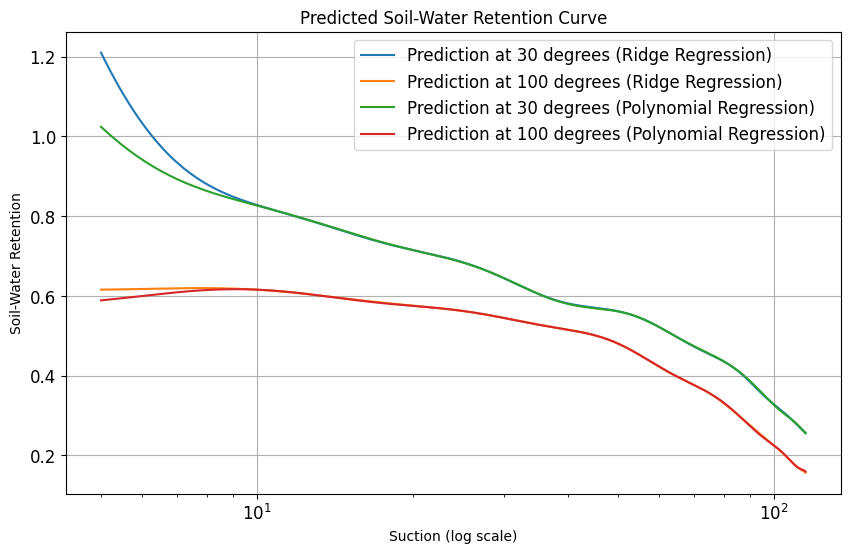

In [ ]:
### Start Coding: make prediction on previously defined X_test_30 and X_test_100, inverse transform your predictions to the original scales
### NOTE: make sure you use the correct 'StandardScaler'

Ridge_predict_30 = Ridge_poly_reg.predict(X_test_30_scaled)
Ridge_predict_100 = Ridge_poly_reg.predict(X_test_100_scaled)
Ridge_predict_30_inv = scalerY.inverse_transform(Ridge_predict_30.reshape(-1, 1))
Ridge_predict_100_inv = scalerY.inverse_transform(Ridge_predict_100.reshape(-1, 1))

### Start Coding: plot soil-water retention curve using both polynomial regression and Ridge regression
plt.figure(figsize=(10, 6))
suc_plot = np.linspace(5, 115, 1000).reshape(1000,1)
plt.semilogx(suc_plot, Ridge_predict_30_inv, label='Prediction at 30 degrees (Ridge Regression)')
plt.semilogx(suc_plot, Ridge_predict_100_inv, label='Prediction at 100 degrees (Ridge Regression)')
plt.semilogx(suc_plot, y_30_predict_inv, label='Prediction at 30 degrees (Polynomial Regression)')
plt.semilogx(suc_plot, y_100_predict_inv, label='Prediction at 100 degrees (Polynomial Regression)')
plt.xlabel('Suction (log scale)')
plt.ylabel('Soil-Water Retention')
plt.title('Predicted Soil-Water Retention Curve')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=12)
plt.grid()

# 3. Non-parametric Models
- K-nearest neighbours (KNN) regression
- Artificial Neural Networks (ANN) regression

## 3.1 K-nearest neighbours (KNN) Regression


Given the number of neighbors $k$ and a input data $\mathbf{x} = (T, \psi)$, KNN regression first identifies $k$ nearest neighbors closest to $\mathbf{x}$, with their indices denoted by $\mathcal{N}(\mathbf{x})$, and then estimates $S(\mathbf{x})$ using the **average** of all the responses of the $k$ nearest neighbors, $\{S_i\}_{i \in \mathcal{N}(\mathbf{x})}$.

$$ \hat{S}(x) = \frac{1}{k} \sum_{i \in \mathcal{N}(x)} S_i \tag{7}$$

**NOTE**: different from what we see in Lab 4, the input points $\mathbf{x}$ are two-dimensional data points, corresponding to two input features.

**We are going to perform the following procedures in this section:**
- Use `GridSearchCV` for cross-validation to obtain the optimal number of nearest neighbors $k$
- Train the best estimator from the grid search result
- Calculate the testing MSE
- Plot the `degree of saturation` vs. `suction` curves (predicted SWRC) at two temperatures

### Step 1: Print out the keys that are available in the `knn_reg` pipeline object

In [ ]:
kfold = 5
k_range = np.arange(1,16) # search for the number of neighbors in range of [1,15]

### Start Coding: create a pipeline
knn_reg = make_pipeline(KNeighborsRegressor())

### Start Coding: Print out keys to help you decide which parameter to cross-validate.
# Use 'estimator.get_params().keys()' method on your pipeline.
knn_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'kneighborsregressor', 'kneighborsregressor__algorithm', 'kneighborsregressor__leaf_size', 'kneighborsregressor__metric', 'kneighborsregressor__metric_params', 'kneighborsregressor__n_jobs', 'kneighborsregressor__n_neighbors', 'kneighborsregressor__p', 'kneighborsregressor__weights'])

### Step 2: Create a `GridSearchCV` object to fnd the optimal $k$

Create a list of parameters to be cross-validated and set `scoring = 'neg_mean_squared_error'` in the grid search.

In [ ]:
### Start Coding
param_grid = {
    'kneighborsregressor__n_neighbors': k_range
}

gs = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv=kfold, scoring = 'neg_mean_squared_error')

### Step 3: Fit the Grid Search object in the previous step on the training data and print the best parameters

In [ ]:
### Start Coding
## Fit your model
gs_result = gs.fit(x_train_s, y_train_s)
print(gs_result.best_params_)

{'kneighborsregressor__n_neighbors': 1}


### Step 4: Train the best estimator from the Grid Search result and calculate the testing MSE

In [ ]:
### Start Coding
knn_reg = neighbors.KNeighborsRegressor(1)

## Fit your model
knn_reg.fit(x_train_s, y_train_s)

# Store predictions of testing data to the 'y_test_predict' variable
y_test_predict = knn_reg.predict(x_test_s)

# Calculate and print the testing MSE
knn_reg_mse = mean_squared_error(y_test_s, y_test_predict)

print("The test MSE for KNN regression is ", knn_reg_mse)

The test MSE for KNN regression is  0.0005252174023360511


### Step 5: Plot the soil-water retention curve
- Again, two curves, for 30 and 100 degrees

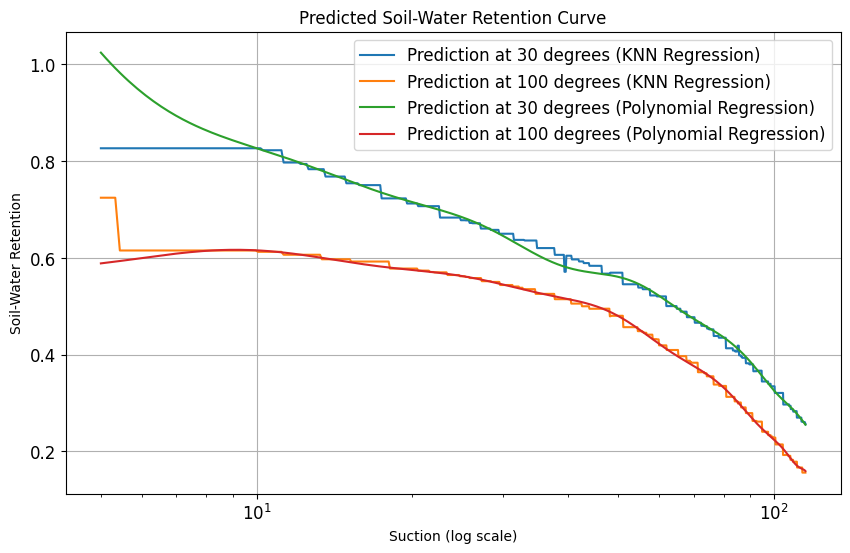

In [ ]:
### Start Coding: make prediction on previously defined X_test_30 and X_test_100, inverse transform your predictions to the original scales
### NOTE: make sure you use the correct 'StandardScaler'

knn_predict_30 = knn_reg.predict(X_test_30_scaled)
knn_predict_100 = knn_reg.predict(X_test_100_scaled)
knn_predict_30_inv = scalerY.inverse_transform(knn_predict_30.reshape(-1, 1))
knn_predict_100_inv = scalerY.inverse_transform(knn_predict_100.reshape(-1, 1))

### Start Coding: Plot the retention curves using polynomial regression and knn
plt.figure(figsize=(10, 6))
suc_plot = np.linspace(5, 115, 1000).reshape(1000,1)
plt.semilogx(suc_plot, knn_predict_30_inv, label='Prediction at 30 degrees (KNN Regression)')
plt.semilogx(suc_plot, knn_predict_100_inv, label='Prediction at 100 degrees (KNN Regression)')
plt.semilogx(suc_plot, y_30_predict_inv, label='Prediction at 30 degrees (Polynomial Regression)')
plt.semilogx(suc_plot, y_100_predict_inv, label='Prediction at 100 degrees (Polynomial Regression)')
plt.xlabel('Suction (log scale)')
plt.ylabel('Soil-Water Retention')
plt.title('Predicted Soil-Water Retention Curve')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=12)
plt.grid()

## 3.2 Artificial Neural Networks (ANN)


The prediction of degree of saturation using ANN can be expressed as:

$$
\hat{S}=\mathcal{N}^{A N N}(T,\psi; \boldsymbol{\Theta}) \tag{8}
$$
where $\mathcal{N}^{A N N}$ represents the layer operations included in the ANN model, and $\boldsymbol{\Theta}$ is the group of all trainable weights and biases in the ANN model.

**We are going to perform the following procedures in this section:**
- Use `RandomizedSearchCV` to find the optimal values of following parameters:
    - Number of layers
    - Number of neurons in each layer
    - Learning rate
- Train the best estimator from the grid search result
- Calculate the testing MSE
- Plot the `degree of saturation` vs. `suction` curves (predicted SWRC) at two temperatures

### Step 1: Define a function for building Neural Network models

In [ ]:
# 1. Define a nueral network model

### Start coding: Define a function for building Neural Network models
# only one output neuron
# It is good practice to provide reasonable defaults to as many hyperparameters as you can, as Scikit-Learn does.
def build_model(n_hidden=8, n_neurons=60, learning_rate=3e-3, input_shape=[2]):

    ### Start coding: initialize a Sequential ann model
    model = keras.models.Sequential()

    ### Start coding: define the input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    ### Start coding: define the hidden layers, using "tanh" activation function
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="tanh"))

    ### Start coding: define the output layer, using "linear" activation function
    # NOTE: put the correct output size
    model.add(keras.layers.Dense(1, activation= "linear"))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
# Now, we are going to put the KerasRegressor wrapper around the defined NN model function
keras_reg =  keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.get_params()

import time
# get the start time
st = time.time()

<ipython-input-97-78ea084f68b6>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg =  keras.wrappers.scikit_learn.KerasRegressor(build_model)


### Step 2: Create a `RandomizedSearchCV` object

Set the ranges of the number of hidden layers, the number of neurons per layer, and the learning rates as $[1,5]$, $[10,100]$, and $[10^{-5},10^{-1}]$, respectively. Use `cv=5` and `n_iter=3` in `RandomizedSearchCV`.

In [ ]:
### Start coding:
# Generate a parameter space
param_distribs = {"n_hidden": np.arange(1, 6).tolist(),
                  "n_neurons": np.arange(10, 101).tolist(),
                  "learning_rate": np.logspace(-5,-1,10000).tolist()}

### Start Coding: define the RandomizedSearchCV (use verbose = 2, n_jobds=-1, random_state=1)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=3, cv=5, verbose=2, n_jobs=-1, random_state=1)

### Step 3: Fit the Grid Search object in the previous step on the training data and print the best parameters

In [ ]:
### Start Coding: do the grid search, each model (defined by a set of parameters) is trained by 200 epochs
rnd_search_cv.fit(x_train_s, y_train_s, epochs=200)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/200
59/59 [==============================] - 1s 2ms/step - loss: 0.6698
Epoch 2/200
59/59 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2147
Epoch 4/200
59/59 [==============================] - 0s 2ms/step - loss: 0.1024
Epoch 5/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 6/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 7/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 8/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 9/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 10/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 11/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 12/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 13/200
59/59 [=================

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7e531ab06470>,
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [1e-05,
                                                          1.0009215505167922e-05,
                                                          1.0018439502889416e-05,
                                                          1.0027672000990756e-05,
                                                          1.0036913007305492e-05,
                                                          1.0046162529674394e-05,
                                                          1.0055420575945396e-05,
                                                          1.0064687153973742e-05,
                                                          1.007396227162184e-05,
                                                          1.0...
                                                          1.0195319497075282e-05,
                                                          1.0204714999026675e-05,
                                                          1.0214119159407767e-05,
                                                          1.0223531986197697e-05,
                                                          1.023295348738302e-05,
                                                          1.024238367095765e-05,
                                                          1.0251822544922805e-05,
                                                          1.0261270117287142e-05,
                                                          1.0270726396066693e-05, ...],
                                        'n_hidden': [1, 2, 3, 4, 5],
                                        'n_neurons': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...]},
                   random_state=1, verbose=2)

In [ ]:
### Start Coding: Print out the best parameters
print(rnd_search_cv.best_params_)

{'n_neurons': 55, 'n_hidden': 4, 'learning_rate': 2.7017375839922856e-05}


### Step 4: Train the best estimator from the Grid Search result and calculate the testing MSE

In [ ]:
# set tensorflow random seed, tf.random.seed(1)
tf.random.set_seed(1)

### Start Coding: train the best estimator with 1000 epochs
ann_reg = rnd_search_cv.best_estimator_
## Fit the model
ann_reg.fit(x_train_s, y_train_s, epochs=1000)

# Store predictions of testing data to the 'y_test_predict' variable
y_test_predict = ann_reg.predict(x_test_s)

Epoch 1/1000
59/59 [==============================] - 2s 3ms/step - loss: 0.4377
Epoch 2/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.1781
Epoch 3/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 4/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 5/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 6/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 7/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 8/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 9/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 10/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 11/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 12/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 13/1000
59/59 [====

In [ ]:
### Start Coding: Calculate testing MSE and print its value
ann_reg_mse = mean_squared_error(y_test_s, y_test_predict)
print("The test MSE for ANN regression is ", ann_reg_mse)

The test MSE for ANN regression is  0.001294478910110268


### Step 5: Plot the soil-water retention curve
- For 30 and 100 degree C

32/32 [==============================] - 0s 6ms/step


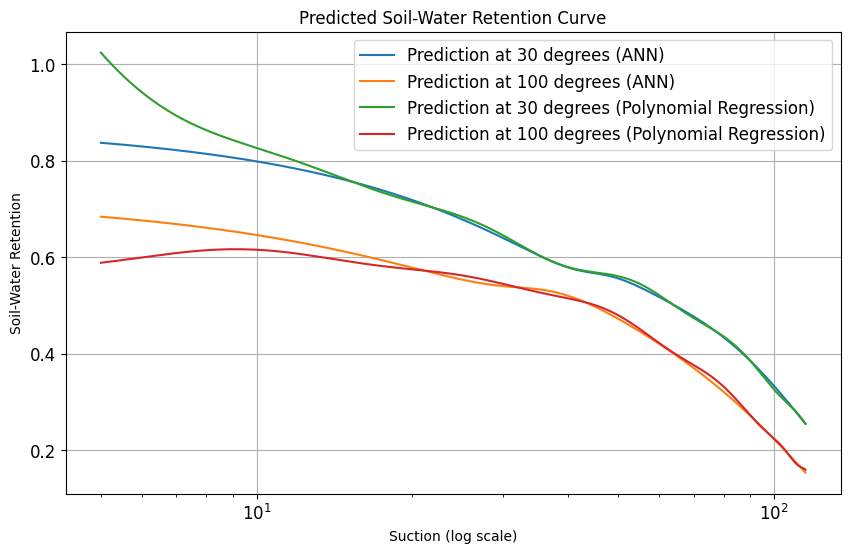

In [ ]:
### Start Coding: make prediction on previously defined X_test_30 and X_test_100, inverse transform your predictions to the original scales
### NOTE: make sure you use the correct 'StandardScaler'
nn_predict_30_scaled = ann_reg.predict(X_test_30_scaled)
nn_predict_100_scaled = ann_reg.predict(X_test_100_scaled)
nn_predict_30 = scalerY.inverse_transform(nn_predict_30_scaled.reshape(-1,1))
nn_predict_100 = scalerY.inverse_transform(nn_predict_100_scaled.reshape(-1,1))

### Start Coding: Plot the retention curves using polynomial regression and ANN
plt.figure(figsize=(10, 6))

suc_plot = np.linspace(5, 115, 1000).reshape(1000,1)
plt.semilogx(suc_plot, nn_predict_30, label='Prediction at 30 degrees (ANN)')
plt.semilogx(suc_plot, nn_predict_100, label='Prediction at 100 degrees (ANN)')
plt.semilogx(suc_plot, y_30_predict_inv, label='Prediction at 30 degrees (Polynomial Regression)')
plt.semilogx(suc_plot, y_100_predict_inv, label='Prediction at 100 degrees (Polynomial Regression)')
plt.xlabel('Suction (log scale)')
plt.ylabel('Soil-Water Retention')
plt.title('Predicted Soil-Water Retention Curve')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=12)
plt.grid()

## ANN with custom-designed loss function

**NOTE**: for the above excercise, we used the built-in mean squared error as the loss function when we compile the neural network model. Recall that the output degree of saturation should have a range of $[0,1]$. We can introduce a penalty term to constrain the NN predicted degrees of saturation such that $\hat{S} \in [0,1]$. However, this will require a **custom-designed loss function** for the neural network.

In [ ]:
y_std = scalerY.scale_
y_mean = scalerY.mean_

def build_model_custom(n_hidden=8, n_neurons=60, learning_rate=3e-3, input_shape=[2]):
    def custom_loss(y_true, y_pred):
      mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
      # No need for explicit regularization term as custom regularizer is used
      # Transform y_pred back to original scale
      y_pred_original = y_pred * y_std + y_mean
      # Penalize deviation from [0, 1] range using ReLU
      penalty = tf.reduce_mean(tf.nn.relu(y_pred_original - 1))
      return mse_loss + penalty

    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="tanh"))

    # Output layer, with only one output neuron
    model.add(keras.layers.Dense(1, activation="linear"))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=custom_loss)
    return model

Now, we are going to do the randomized grid search for the ANN model with additionally added constraint.

In [ ]:
### Start coding: create a keras wrapper for 'build_model_custom' function
keras_reg_cus = keras.wrappers.scikit_learn.KerasRegressor(build_model_custom)
keras_reg_cus.get_params()

<ipython-input-111-9b6567ecde4e>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg_cus = keras.wrappers.scikit_learn.KerasRegressor(build_model_custom)


{'build_fn': <function __main__.build_model_custom(n_hidden=8, n_neurons=60, learning_rate=0.003, input_shape=[2])>}

In [ ]:
### Start coding: define the parameter space, the same as the previous ANN model

param_distribs = {"n_hidden": np.arange(1, 5).tolist(),
                  "n_neurons": np.arange(10, 100).tolist(),
                  "learning_rate": np.logspace(-5,-1,10000).tolist()}

### Start Coding: define the RandomizedSearchCV with the same n_iter, cv, verbose, and random_state as for the previous ANN model
rnd_search_cv2 = RandomizedSearchCV(keras_reg_cus, param_distribs, n_iter=3, cv=5, verbose=2, n_jobs=-1, random_state=1)

In [ ]:
### Start Coding: fit the grid search, each model is trained by 200 epochs

rnd_search_cv2.fit(x_train_s, y_train_s, epochs=200)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/200
59/59 [==============================] - 1s 2ms/step - loss: 0.0825
Epoch 2/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 4/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 5/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 6/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 7/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 8/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 9/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 10/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 11/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 12/200
59/59 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/200
59/59 [=================

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7e531b1e60b0>,
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [1e-05,
                                                          1.0009215505167922e-05,
                                                          1.0018439502889416e-05,
                                                          1.0027672000990756e-05,
                                                          1.0036913007305492e-05,
                                                          1.0046162529674394e-05,
                                                          1.0055420575945396e-05,
                                                          1.0064687153973742e-05,
                                                          1.007396227162184e-05,
                                                          1.0...
                                                          1.0195319497075282e-05,
                                                          1.0204714999026675e-05,
                                                          1.0214119159407767e-05,
                                                          1.0223531986197697e-05,
                                                          1.023295348738302e-05,
                                                          1.024238367095765e-05,
                                                          1.0251822544922805e-05,
                                                          1.0261270117287142e-05,
                                                          1.0270726396066693e-05, ...],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...]},
                   random_state=1, verbose=2)

In [ ]:
### Start Coding: Print out the best parameters
print(rnd_search_cv2.best_params_)

{'n_neurons': 26, 'n_hidden': 3, 'learning_rate': 0.007136501288405949}


In [ ]:
# set tensorflow random seed, tf.random.seed(1)
tf.random.set_seed(1)

### Start Coding: train the best estimator with 1000 epochs
ann_reg_cus = rnd_search_cv2.best_estimator_
## Fit (train) your model
ann_reg_cus.fit(x_train_s, y_train_s, epochs=1000)

Epoch 1/1000
59/59 [==============================] - 1s 2ms/step - loss: 0.0844
Epoch 2/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 4/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 5/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 6/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 7/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 8/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 9/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 10/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 11/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 12/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 13/1000
59/59 [====

In [ ]:
### Start Coding: Calculate testing MSE and print its value
y_test_predict = ann_reg_cus.predict(x_test_s)
ann_reg_cus_mse = mean_squared_error(y_test_s, y_test_predict)
print("The test MSE for ANN regression is ", ann_reg_cus_mse)

26/26 [==============================] - 0s 3ms/step
The test MSE for ANN regression is  0.0007824617899871868


32/32 [==============================] - 0s 3ms/step


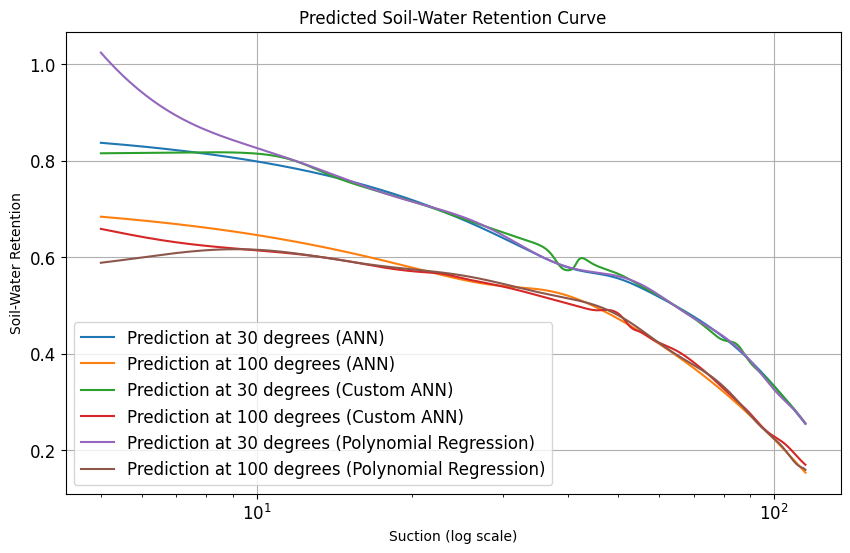

In [ ]:
### Start Coding: make prediction on previously defined X_test_30 and X_test_100, inverse transform your predictions to the original scales
### NOTE: make sure you use the correct 'StandardScaler'
nn2_predict_30_scaled = ann_reg_cus.predict(X_test_30_scaled)
nn2_predict_100_scaled = ann_reg_cus.predict(X_test_100_scaled)
nn2_predict_30 = scalerY.inverse_transform(nn2_predict_30_scaled.reshape(-1,1))
nn2_predict_100 = scalerY.inverse_transform(nn2_predict_100_scaled.reshape(-1,1))


### Start Coding: Plot the retention curves for the prediction of two ann models
plt.figure(figsize=(10, 6))

suc_plot = np.linspace(5, 115, 1000).reshape(1000,1)
plt.semilogx(suc_plot, nn_predict_30, label='Prediction at 30 degrees (ANN)')
plt.semilogx(suc_plot, nn_predict_100, label='Prediction at 100 degrees (ANN)')
plt.semilogx(suc_plot, nn2_predict_30, label='Prediction at 30 degrees (Custom ANN)')
plt.semilogx(suc_plot, nn2_predict_100, label='Prediction at 100 degrees (Custom ANN)')
plt.semilogx(suc_plot, y_30_predict_inv, label='Prediction at 30 degrees (Polynomial Regression)')
plt.semilogx(suc_plot, y_100_predict_inv, label='Prediction at 100 degrees (Polynomial Regression)')
plt.xlabel('Suction (log scale)')
plt.ylabel('Soil-Water Retention')
plt.title('Predicted Soil-Water Retention Curve')

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=12)
plt.grid()

# 4. Comparison and Discussion

## 4.1 Comparison
Let's test the prediction performance of the previously trained models (polynomial regression, Ridge regression, KNN, built-in ANN, and ANN with an additional constraint) for some unseen data stored in 'NewData.csv'. Note that these additional (temperature, suction, degree of saturation) data are not included in the previous training or testing data. They are experimental data obtained from Figure. 5 in [1].


In [ ]:
### Start coding: read the 'NewData.csv' into a dataframe and show the first 10 rows
df2 = pd.read_csv(base_path + 'data/NewData.csv')
df2.head(10)

,Temperature,Suction,S
0,41,81.620771,0.406546
1,41,63.776565,0.497044
2,41,38.221866,0.567179
3,41,16.081839,0.707450
4,101,59.921333,0.406869
5,101,47.254142,0.497044
6,101,22.140063,0.566856
7,101,2.863881,0.706804
8,26,86.145427,0.406974
9,26,65.457390,0.498493


In [ ]:
df2 = df2.to_numpy() # convert Dataframe to Numpy array
print('Shape of Dataframe: ', df2.shape)
n_predict2 = df2.shape[0]   # number of prediction points
print('Number of prediction points: ', n_predict2)

Shape of Dataframe:  (16, 3)
Number of prediction points:  16


In [ ]:
### Start Coding: define the input and output for prediction
# standarize data before prediction
# make sure you use the correct StandardScaler

x_predict = df2[:, 0:2]
y_predict = df2[:, 2]


x_predict_s = scalerX.transform(x_predict)
y_predict_s = scalerY.transform(y_predict.reshape(-1,1))


In [ ]:
### Start Coding:
## Do the predictions and evaluate the MSE for each models

## 1. Polynomial regression model
y_predict_predict1 = reg_model.predict(x_predict_s)
poly_mse_predict = mean_squared_error(y_predict_s, y_predict_predict1)
print('The MSE for the prediction of new data points using polynomial regression is: ', poly_mse_predict)

## 2. Ridge regression model
y_predict_predict2 = Ridge_poly_reg.predict(x_predict_s)
Ridge_poly_mse_predict = mean_squared_error(y_predict_s, y_predict_predict2)
print('The MSE for the prediction of new data points using Ridge polynomial regression is: ', Ridge_poly_mse_predict)

## 3. KNN
y_predict_predict3 = knn_reg.predict(x_predict_s)
knn_mse_predict = mean_squared_error(y_predict_s, y_predict_predict3)
print('The MSE for the prediction of new data points using KNN is: ', knn_mse_predict)

## 4. ANN
y_predict_predict4 = ann_reg.predict(x_predict_s)
ann_mse_predict = mean_squared_error(y_predict_s, y_predict_predict4)
print('The MSE for the prediction of new data points using ANN is: ', ann_mse_predict)

## 5. ANN with constraint on the output
y_predict_predict5 = ann_reg_cus.predict(x_predict_s)
ann_cus_mse_predict = mean_squared_error(y_predict_s, y_predict_predict5)
print('The MSE for the prediction of new data points using ANN with penalty is: ', ann_cus_mse_predict)


The MSE for the prediction of new data points using polynomial regression is:  0.05991382716479861
The MSE for the prediction of new data points using Ridge polynomial regression is:  0.032187283194844304
The MSE for the prediction of new data points using KNN is:  0.003661713049401649
1/1 [==============================] - 0s 38ms/step
The MSE for the prediction of new data points using ANN is:  0.005423938831703216
1/1 [==============================] - 0s 25ms/step
The MSE for the prediction of new data points using ANN with penalty is:  0.004904729376178594


Now, let's compare the prediction of soil-water retention curve at 26 degree C using all the trained models.

32/32 [==============================] - 0s 1ms/step
Execution time: 1970.6035137176514 seconds


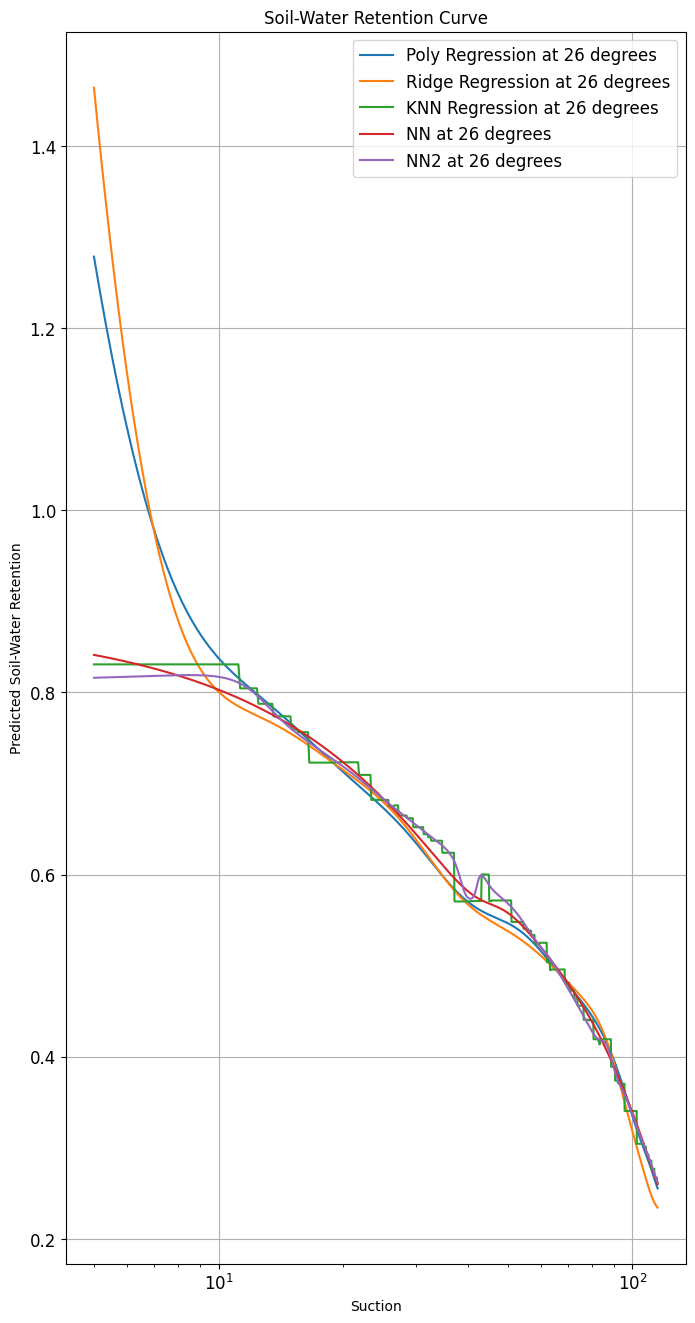

In [ ]:
### Start coding:
# 1. Generate prediction points:
# Generate 1000 uniformly sampled suction data within range [5,115] MPa
# Generate 1000 temperature points that are all 26 degree C
# Then combine the two and create a prediction data (remember to standarized)

suc_plot = np.linspace(5, 115, 1000).reshape(1000,1)
temp_plot3 = np.ones((1000,1))*26 # create a vector of 1000 data with each element as 26 degree
## combine the temperature and suction data points
X_test_26 = np.hstack((temp_plot3, suc_plot))
X_test_26_s = scalerX.transform(X_test_26)

# 2. Using the trained models to predict the degree of saturation, transform back to the original scale

# Polynomial regression
poly_theta_26 = scalerY.inverse_transform(reg_model.predict(X_test_26_s).reshape(-1, 1))

# Ridge regression
Ridge_theta_26 = scalerY.inverse_transform(Ridge_poly_reg.predict(X_test_26_s).reshape(-1, 1))

# KNN
KNN_theta_26 = scalerY.inverse_transform(knn_reg.predict(X_test_26_s).reshape(-1, 1))

# ANN
ANN_theta_26 = scalerY.inverse_transform(ann_reg.predict(X_test_26_s).reshape(-1, 1))

# ANN with constraint
ANN_cus_theta_26 = scalerY.inverse_transform(ann_reg_cus.predict(X_test_26_s).reshape(-1, 1))

# 3. Plot predicted degree of saturation vs. log10(suction) for all predictions in one figure
plt.figure(figsize=(8, 16))
plt.semilogx(suc_plot, poly_theta_26, label='Poly Regression at 26 degrees')
plt.semilogx(suc_plot, Ridge_theta_26, label='Ridge Regression at 26 degrees')
plt.semilogx(suc_plot, KNN_theta_26, label='KNN Regression at 26 degrees')
plt.semilogx(suc_plot, ANN_theta_26, label='NN at 26 degrees')
plt.semilogx(suc_plot,ANN_cus_theta_26 , label='NN2 at 26 degrees')
plt.xlabel('Suction')
plt.ylabel('Predicted Soil-Water Retention')
plt.title('Soil-Water Retention Curve')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=12)
plt.grid()
# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

## 4.2 Discussion

- Would you recommend to use the **polynomial regression** as an estimation of the soil-water retention behavior for this specific soil data? (considering your result on optimal degree of polynomial, the number parameters, the output degree of saturation range for different temperatures [especially for low temperatures], etc.)

    **Compared to the other models, polynomial regression had the least variance, which can be observed from the plots. It also best resembles the original data for the given temperatures. Moreover, my model used a polynomial of degree 7 which is a reasonable number. Therefore, it unlikely to be subjected to underfitting or overfitting.**

- What are the advantages and disadvantages of using **non-parametric** machine learning models to learn the soil-water retention behaviors?

    **One advantage of non-parametric models is that they are not restricted to matching a specific function like with polynomial regression. They can also be much faster and simpler to implement for smaller data sets. On the other hand, one major disadvantage of non-parametric models is that they rely heavily on the quality of the data. If the data has a lot of variance, it can lead to the model becoming overfitted.**

- Compare the optimal ANN models **with and without the constraint** on the output, considering the number of trainable parameters, prediction performance, etc.

    **The two ANN models both performed about the same as each other. For the data at 26 degrees, the MSE of each model were very similar to each other. Consequently, the graphs were also very similar. Both ANN models had very low MSEs as well. Compared to the polynomial regression model, the two ANN models were a little less flexible, as seen with the slight variance in their respective plots. One downside was that finding the best estimators took much longer than the other models.**

- Which model would you recommend to predict the soil-water retention behaviors? State your reasoning.

    **I would pick the constrained ANN model. As mentioned in the previous question, the two ANN models had a better balance of bias-variance compared to the polynomial models, which would have also been reasonable choices. While the two ANN models performed fairly similarily to each other, the constrained model had less variance when training the model.**
    

- As you observed, the various models have different parameters that must be tuned in order to achieve good performance. Now considering the ease of parameter tuning alone, would you still select the same model as you did in the previous discussion question? Explain why.

    **I would pick polynomial regression. With proper fitting, it had consistent and fairly reasonable performance. It is also very simple and less computationally expensive to implement compared to the other models.**

## References
1. Villar, M. V., and Gòmez-Espina, R.. 2007. “Retention Curves of Two Bentonites at High Temperature.” Experimental Unsaturated Soil Mechanics, June, 267–74. https://doi.org/10.1007/3-540-69873-6_26.
2. Villar, M. V., and Gómez-Espina, R.. 2008. “Effect of Temperature on the Water Retention Capacity of FEBEX and MX-80 Bentonites.” Unsaturated Soils. Advances in Geo-Engineering, June, 273–78. https://doi.org/10.1201/9780203884430-36.
3. Lu, N.. 2016. “Generalized Soil Water Retention Equation for Adsorption and Capillarity.” Journal of Geotechnical and Geoenvironmental Engineering 142 (10): 04016051.
4. Brooks, R. H., and Corey, A. T.. 1964. “Hydraulic Properties of Porous Media.” Hydrology Paper No. 3. Fort Collins, CO: Colorado State Univ.
5. van Genuchten, M. T.. 1980. “A Closed-Form Equation for Predicting the Hydraulic Conductivity of Unsaturated Soils.” Soil Science Society of America Journal 44 (5): 892–98.
6. Fredlund, D. G., and Xing, A.. 1994. “Equations for the Soil-Water Characteristic Curve.” Canadian Geotechnical Journal 31 (4): 521–32. https://doi.org/10.1139/T94-061.
